<a id=top-page></a>

# Cost function response to data sampling

In this notebook, we explore the response of the cost function, $\mathcal{L}$, to random data sampling.

Datasets are sampled at:

- 5%
- 20%
- 50%
- 80%
- 100% (full data)

The analysis in this notebook is performed in the following steps:

- [Load the reacting flow data](#reacting)
    - [Hydrogen/air combustion](#reacting-hydrogen)
        - [Plot the result of data sampling on 2D projections](#reacting-hydrogen-2D)
        - [Plot the result of data sampling on 3D projections](#reacting-hydrogen-3D)
    - [Syngas/air combustion](#reacting-syngas)
        - [Plot the result of data sampling on 2D projections](#reacting-syngas-2D)
        - [Plot the result of data sampling on 3D projections](#reacting-syngas-3D)
- [Load the plasma data](#plasma)
    - [Plot the result of data sampling on 2D projections](#plasma-2D)
    - [Plot the result of data sampling on 3D projections](#plasma-3D)
- [Load the atmospheric dispersion data](#atmo)
    - [Plot the result of data sampling on 2D projections](#atmo-2D)
    - [Plot the result of data sampling on 3D projections](#atmo-3D)
    
***

In [1]:
%run -i imports.py
%matplotlib inline

In [2]:
bandwidth_values = np.logspace(-7, 3, 200)
penalty_function = 'log-sigma-over-peak'
norm = 'cumulative'
power = 1
save_csv = True
color_map_colors = cm.get_cmap('Greys')
colors = np.flipud(color_map_colors(np.linspace(0.1, 1, 5)))

<a id=reacting></a>
***

## Load the reacting flow data

[Go to the top](#top-page)

In [3]:
sample_percentage_list = [5, 20, 50, 80, 100]

In [4]:
scalings_list = ['none', 'auto', 'pareto', 'vast', 'range', '0to1', '-1to1', 'level', 'max', 'poisson', 'vast_2', 'vast_3', 'vast_4']
tex_scalings_list = ['None', 'Auto', 'Pareto', 'VAST', 'Range', '$\\langle 0, 1 \\rangle$', '$\\langle -1, 1 \\rangle$', 'Level', 'Max', 'Poisson', 'S1', 'S2', 'S3']

<a id=reacting-hydrogen></a>

### Hydrogen/air combustion

[Go to the top](#top-page)

In [ ]:
state_space = pd.read_csv('../data/reacting-flow-hydrogen-air-steady-state-space.csv', header=None).to_numpy()
state_space_names = pd.read_csv('../data/reacting-flow-hydrogen-air-steady-state-space-names.csv', header=None).to_numpy().ravel()
mixture_fraction = pd.read_csv('../data/reacting-flow-hydrogen-air-steady-mixture-fraction.csv', header=None).to_numpy()
dissipation_rates = pd.read_csv('../data/reacting-flow-hydrogen-air-steady-dissipation-rates.csv', header=None).to_numpy()

target_variables_idx = [0, 2, 4, 5, 6]
target_variables = state_space[:,target_variables_idx]
target_variables_names = state_space_names[target_variables_idx]

(n_observations, n_variables) = np.shape(state_space)

<p style="color:green;">► You only need to run this once to generate the `csv` files in `../results/`:</p>

In [ ]:
for n_components in [2,3]:

    for sample_percentage in sample_percentage_list:

        print('\nRunning for ' + str(n_components) + 'D LDM, for ' + str(sample_percentage) + '% of data\n')

        costs = []

        idx = np.zeros((n_observations,)).astype(int)
        sample_random = preprocess.DataSampler(idx, random_seed=random_seed, verbose=False)
        (idx_test, _) = sample_random.random(sample_percentage)

        for scaling in scalings_list:

            print(scaling)

            tic = time.perf_counter()

            pca = reduction.PCA(state_space, scaling=scaling, n_components=n_components)
            PCs = pca.transform(state_space)

            variance_data = analysis.compute_normalized_variance(PCs[idx_test,:],
                                                                 target_variables[idx_test,:],
                                                                 depvar_names=target_variables_names,
                                                                 bandwidth_values=bandwidth_values)

            cost = analysis.cost_function_normalized_variance_derivative(variance_data, 
                                                                         penalty_function=penalty_function, 
                                                                         power=power,
                                                                         norm=norm)

            costs.append(cost)

            print('Pure scaling cost:\t' + str(round(cost,4)))

            toc = time.perf_counter()

            print(f'\tTime it took: {(toc - tic)/60:0.1f} minutes.\n' + '-'*40)

        if save_csv:

            np.savetxt('../results/SUPPLEMENT-reacting-flow-hydrogen-air-perc-of-data-' + str(sample_percentage) + '-' + str(n_components) + 'D-LDM-optimizing-on-' + '-'.join(target_variables_names) + '-pure-scaling-cost-' + norm + '.csv', (costs), delimiter=',', fmt='%.16e')
            np.savetxt('../results/SUPPLEMENT-reacting-flow-hydrogen-air-perc-of-data-' + str(sample_percentage) + '-' + str(n_components) + 'D-LDM-optimizing-on-' + '-'.join(target_variables_names) + '-scalings-list.csv', (scalings_list), delimiter=',', fmt='%s')

<a id=reacting-hydrogen-2D></a>
#### Plot the result of data sampling on 2D projections

[Go to the top](#top-page)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

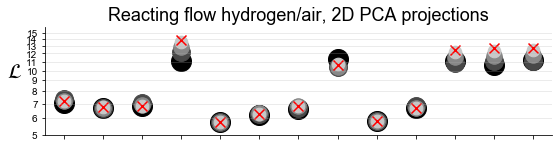

In [5]:
fig = plt.figure(figsize=(len(tex_scalings_list)*0.7, 2))
fig.tight_layout(pad=-30)
widths = [1]
heights = [1]
spec = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths, height_ratios=heights)
x_range = np.array([i for i in range(0,len(tex_scalings_list))])
ax = fig.add_subplot(spec[0,0])

for i, sample_percentage in enumerate(sample_percentage_list):
    costs = pd.read_csv('../results/SUPPLEMENT-reacting-flow-hydrogen-air-perc-of-data-' + str(sample_percentage) + '-2D-LDM-optimizing-on-T-H2-OH-H2O-O2-pure-scaling-cost-cumulative.csv', sep = ',', header=None).to_numpy()
    if sample_percentage ==100:
        plt.scatter(x_range, costs, c='r', marker='x', s=100, linewidths=2, label=str(sample_percentage) + '%')
    else:
        plt.scatter(x_range, costs, c=colors[i], marker='o', s=400-80*i, label=str(sample_percentage) + '%')

plt.xticks(x_range, [], fontsize=16)
plt.grid(alpha=0.3, zorder=0)
plt.xlim([-0.5,len(tex_scalings_list)-0.5])
ax.set_yscale('log')
ax.set_yticks([5,6,7,8,9,10,11,12,13,14,15])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.ylim([5,16])
plt.ylabel('$\mathcal{L}$', fontsize=20, rotation=0, horizontalalignment='right')
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
ax.xaxis.grid(False)
ax.yaxis.grid(True)
plt.title('Reacting flow hydrogen/air, 2D PCA projections', fontsize=18)

plt.savefig('../figures/supplement-reacting-flow-hydrogen-air-data-sampling-2D-LDM.svg', dpi=200, bbox_inches='tight')

<a id=reacting-hydrogen-3D></a>
#### Plot the result of data sampling on 3D projections

[Go to the top](#top-page)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

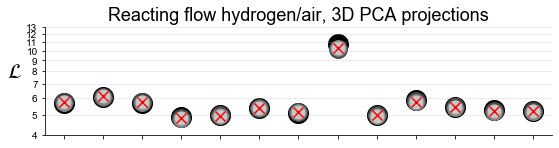

In [6]:
fig = plt.figure(figsize=(len(tex_scalings_list)*0.7, 2))
fig.tight_layout(pad=-30)
widths = [1]
heights = [1]
spec = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths, height_ratios=heights)
x_range = np.array([i for i in range(0,len(tex_scalings_list))])
ax = fig.add_subplot(spec[0,0])

for i, sample_percentage in enumerate(sample_percentage_list):
    costs = pd.read_csv('../results/SUPPLEMENT-reacting-flow-hydrogen-air-perc-of-data-' + str(sample_percentage) + '-3D-LDM-optimizing-on-T-H2-OH-H2O-O2-pure-scaling-cost-cumulative.csv', sep = ',', header=None).to_numpy()
    if sample_percentage ==100:
        plt.scatter(x_range, costs, c='r', marker='x', s=100, linewidths=2, label=str(sample_percentage) + '%')
    else:
        plt.scatter(x_range, costs, c=colors[i], marker='o', s=400-80*i, label=str(sample_percentage) + '%')

plt.xticks(x_range, [], fontsize=16)
plt.grid(alpha=0.3, zorder=0)
plt.xlim([-0.5,len(tex_scalings_list)-0.5])
ax.set_yscale('log')
ax.set_yticks([4,5,6,7,8,9,10,11,12,13])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.ylim([4,13])
plt.ylabel('$\mathcal{L}$', fontsize=20, rotation=0, horizontalalignment='right')
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
ax.xaxis.grid(False)
ax.yaxis.grid(True)
plt.title('Reacting flow hydrogen/air, 3D PCA projections', fontsize=18)

plt.savefig('../figures/supplement-reacting-flow-hydrogen-air-data-sampling-3D-LDM.svg', dpi=200, bbox_inches='tight')

<a id=reacting-syngas></a>

### Syngas/air combustion

[Go to the top](#top-page)

In [ ]:
state_space = pd.read_csv('../data/reacting-flow-syngas-air-steady-state-space.csv', header=None).to_numpy()
state_space_names = pd.read_csv('../data/reacting-flow-syngas-air-steady-state-space-names.csv', header=None).to_numpy().ravel()
mixture_fraction = pd.read_csv('../data/reacting-flow-syngas-air-steady-mixture-fraction.csv', header=None).to_numpy()
dissipation_rates = pd.read_csv('../data/reacting-flow-syngas-air-steady-dissipation-rates.csv', header=None).to_numpy()

state_space = state_space[:,0:-1]
state_space_names = state_space_names[0:-1]

target_variables_idx = [0, 1, 2, 4, 5, 8, 9]
target_variables = state_space[:,target_variables_idx]
target_variables_names = state_space_names[target_variables_idx]

(n_observations, n_variables) = np.shape(state_space)

<p style="color:green;">► You only need to run this once to generate the `csv` files in `../results/`:</p>

In [ ]:
for n_components in [2,3]:

    for sample_percentage in sample_percentage_list:

        print('\nRunning for ' + str(n_components) + 'D LDM, for ' + str(sample_percentage) + '% of data\n')

        costs = []

        idx = np.zeros((n_observations,)).astype(int)
        sample_random = preprocess.DataSampler(idx, random_seed=random_seed, verbose=False)
        (idx_test, _) = sample_random.random(sample_percentage)

        for scaling in scalings_list:

            print(scaling)

            tic = time.perf_counter()

            pca = reduction.PCA(state_space, scaling=scaling, n_components=n_components)
            PCs = pca.transform(state_space)

            variance_data = analysis.compute_normalized_variance(PCs[idx_test,:],
                                                                 target_variables[idx_test,:],
                                                                 depvar_names=target_variables_names,
                                                                 bandwidth_values=bandwidth_values)

            cost = analysis.cost_function_normalized_variance_derivative(variance_data, 
                                                                         penalty_function=penalty_function, 
                                                                         power=power,
                                                                         norm=norm)

            costs.append(cost)

            print('Pure scaling cost:\t' + str(round(cost,4)))

            toc = time.perf_counter()

            print(f'\tTime it took: {(toc - tic)/60:0.1f} minutes.\n' + '-'*40)

        if save_csv:

            np.savetxt('../results/SUPPLEMENT-reacting-flow-syngas-air-perc-of-data-' + str(sample_percentage) + '-' + str(n_components) + 'D-LDM-optimizing-on-' + '-'.join(target_variables_names) + '-pure-scaling-cost-' + norm + '.csv', (costs), delimiter=',', fmt='%.16e')
            np.savetxt('../results/SUPPLEMENT-reacting-flow-syngas-air-perc-of-data-' + str(sample_percentage) + '-' + str(n_components) + 'D-LDM-optimizing-on-' + '-'.join(target_variables_names) + '-scalings-list.csv', (scalings_list), delimiter=',', fmt='%s')

<a id=reacting-syngas-2D></a>
#### Plot the result of data sampling on 2D projections

[Go to the top](#top-page)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

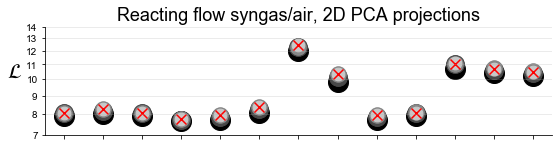

In [7]:
fig = plt.figure(figsize=(len(tex_scalings_list)*0.7, 2))
fig.tight_layout(pad=-30)
widths = [1]
heights = [1]
spec = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths, height_ratios=heights)
x_range = np.array([i for i in range(0,len(tex_scalings_list))])
ax = fig.add_subplot(spec[0,0])

for i, sample_percentage in enumerate(sample_percentage_list):
    costs = pd.read_csv('../results/SUPPLEMENT-reacting-flow-syngas-air-perc-of-data-' + str(sample_percentage) + '-2D-LDM-optimizing-on-T-H2-O2-OH-H2O-CO-CO2-pure-scaling-cost-cumulative.csv', sep = ',', header=None).to_numpy()
    if sample_percentage ==100:
        plt.scatter(x_range, costs, c='r', marker='x', s=100, linewidths=2, label=str(sample_percentage) + '%')
    else:
        plt.scatter(x_range, costs, c=colors[i], marker='o', s=400-80*i, label=str(sample_percentage) + '%')

plt.xticks(x_range, [], fontsize=16)
plt.grid(alpha=0.3, zorder=0)
plt.xlim([-0.5,len(tex_scalings_list)-0.5])
ax.set_yscale('log')
ax.set_yticks([6,7,8,9,10,11,12,13,14])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.ylim([7,14])
plt.ylabel('$\mathcal{L}$', fontsize=20, rotation=0, horizontalalignment='right')
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
ax.xaxis.grid(False)
ax.yaxis.grid(True)
plt.title('Reacting flow syngas/air, 2D PCA projections', fontsize=18)

plt.savefig('../figures/supplement-reacting-flow-syngas-air-data-sampling-2D-LDM.svg', dpi=200, bbox_inches='tight')

<a id=reacting-syngas-3D></a>
#### Plot the result of data sampling on 3D projections

[Go to the top](#top-page)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

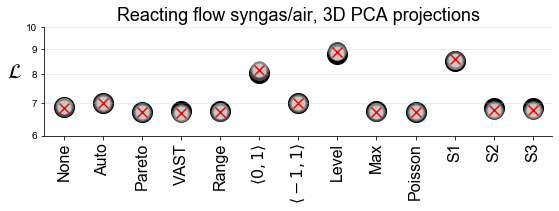

In [8]:
fig = plt.figure(figsize=(len(tex_scalings_list)*0.7, 2))
fig.tight_layout(pad=-30)
widths = [1]
heights = [1]
spec = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths, height_ratios=heights)
x_range = np.array([i for i in range(0,len(tex_scalings_list))])
ax = fig.add_subplot(spec[0,0])

for i, sample_percentage in enumerate(sample_percentage_list):
    costs = pd.read_csv('../results/SUPPLEMENT-reacting-flow-syngas-air-perc-of-data-' + str(sample_percentage) + '-3D-LDM-optimizing-on-T-H2-O2-OH-H2O-CO-CO2-pure-scaling-cost-cumulative.csv', sep = ',', header=None).to_numpy()
    if sample_percentage ==100:
        plt.scatter(x_range, costs, c='r', marker='x', s=100, linewidths=2, label=str(sample_percentage) + '%')
    else:
        plt.scatter(x_range, costs, c=colors[i], marker='o', s=400-80*i, label=str(sample_percentage) + '%')

plt.xticks(x_range, tex_scalings_list, fontsize=16, rotation=90)
plt.grid(alpha=0.3, zorder=0)
plt.xlim([-0.5,len(tex_scalings_list)-0.5])
ax.set_yscale('log')
ax.set_yticks([6,7,8,9,10])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.ylim([6,10])
plt.ylabel('$\mathcal{L}$', fontsize=20, rotation=0, horizontalalignment='right')
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
ax.xaxis.grid(False)
ax.yaxis.grid(True)
plt.title('Reacting flow syngas/air, 3D PCA projections', fontsize=18)
# plt.legend(frameon=False, ncol=5, bbox_to_anchor=(1,1), fontsize=18, handletextpad=0)
# plt.savefig('../figures/data-sampling-legend.svg', dpi=200, bbox_inches='tight')
           
plt.savefig('../figures/supplement-reacting-flow-syngas-air-data-sampling-3D-LDM.svg', dpi=200, bbox_inches='tight')

<a id=plasma></a>
***

## Load the plasma data

[Go to the top](#top-page)

In [10]:
sample_percentage_list = [5, 20, 50]

In [11]:
scalings_list = ['none', 'auto', 'pareto', 'vast', 'range', '0to1', '-1to1', 'level', 'max']
tex_scalings_list = ['None', 'Auto', 'Pareto', 'VAST', 'Range', '$\\langle 0, 1 \\rangle$', '$\\langle -1, 1 \\rangle$', 'Level', 'Max']

In [ ]:
X = pd.read_csv('../data/plasma-physics-argon-plasma-state-space.csv', header=None).to_numpy()
X_names = pd.read_csv('../data/plasma-physics-argon-plasma-state-space-names.csv', header=None).to_numpy().ravel()

target_variables_idx = [0, 1, 2, 3]
target_variables = X[:,target_variables_idx]
target_variables_names = X_names[target_variables_idx]

(n_observations, n_variables) = np.shape(X)

<p style="color:green;">► You only need to run this once to generate the `csv` files in `../results/`:</p>

In [ ]:
for n_components in [2,3]:

    for sample_percentage in sample_percentage_list:

        print('\nRunning for ' + str(n_components) + 'D LDM, for ' + str(sample_percentage) + '% of data\n')

        costs = []

        idx = np.zeros((n_observations,)).astype(int)
        sample_random = preprocess.DataSampler(idx, random_seed=random_seed, verbose=False)
        (idx_test, _) = sample_random.random(sample_percentage)

        for scaling in scalings_list:

            print(scaling)

            tic = time.perf_counter()

            pca = reduction.PCA(X, scaling=scaling, n_components=n_components)
            PCs = pca.transform(X)  

            variance_data = analysis.compute_normalized_variance(PCs[idx_test,:],
                                                        target_variables[idx_test,:],
                                                        depvar_names=target_variables_names,
                                                        bandwidth_values=bandwidth_values)

            cost = analysis.cost_function_normalized_variance_derivative(variance_data, 
                                                                         penalty_function=penalty_function, 
                                                                         power=power,
                                                                         norm=norm)

            costs.append(cost)

            print('Pure scaling cost:\t' + str(round(cost,4)))

            toc = time.perf_counter()

            print(f'\tTime it took: {(toc - tic)/60:0.1f} minutes.\n' + '-'*40)

        if save_csv:

            np.savetxt('../results/SUPPLEMENT-plasma-physics-perc-of-data-' + str(sample_percentage) + '-' + str(n_components) + 'D-LDM-optimizing-on-Te-Th-Ye-YAr-pure-scaling-cost-' + norm + '.csv', (costs), delimiter=',', fmt='%.16e')
            np.savetxt('../results/SUPPLEMENT-plasma-physics-perc-of-data-' + str(sample_percentage) + '-' + str(n_components) + 'D-LDM-optimizing-on-Te-Th-Ye-YAr-scalings-list.csv', (scalings_list), delimiter=',', fmt='%s')

<a id=plasma-2D></a>

### Plot the result of data sampling on 2D projections

[Go to the top](#top-page)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


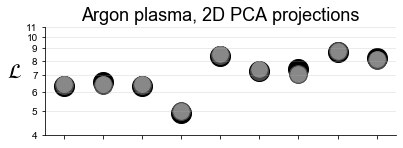

In [12]:
fig = plt.figure(figsize=(len(tex_scalings_list)*0.7, 2))
fig.tight_layout(pad=-30)
widths = [1]
heights = [1]
spec = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths, height_ratios=heights)
x_range = np.array([i for i in range(0,len(tex_scalings_list))])
ax = fig.add_subplot(spec[0,0])

for i, sample_percentage in enumerate(sample_percentage_list):
    costs = pd.read_csv('../results/SUPPLEMENT-plasma-physics-perc-of-data-' + str(sample_percentage) + '-2D-LDM-optimizing-on-Te-Th-Ye-YAr-pure-scaling-cost-cumulative.csv', sep = ',', header=None).to_numpy()
    if sample_percentage == 100:
        plt.scatter(x_range, costs, c='r', marker='x', s=100, linewidths=2, label=str(sample_percentage) + '%')
    else:
        plt.scatter(x_range, costs, c=colors[i], marker='o', s=400-80*i, label=str(sample_percentage) + '%')

plt.xticks(x_range, [], fontsize=16)
plt.grid(alpha=0.3, zorder=0)
plt.xlim([-0.5,len(tex_scalings_list)-0.5])
ax.set_yscale('log')
ax.set_yticks([4,5,6,7,8,9,10,11])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.ylim([4,11])
plt.ylabel('$\mathcal{L}$', fontsize=20, rotation=0, horizontalalignment='right')
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
ax.xaxis.grid(False)
ax.yaxis.grid(True)
plt.title('Argon plasma, 2D PCA projections', fontsize=18)

plt.savefig('../figures/supplement-plasma-physics-data-sampling-2D-LDM.svg', dpi=200, bbox_inches='tight')

<a id=plasma-3D></a>

### Plot the result of data sampling on 3D projections

[Go to the top](#top-page)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


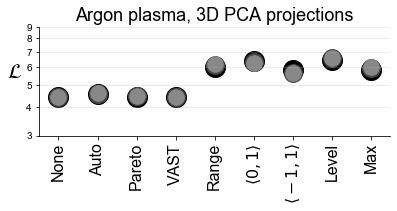

In [13]:
fig = plt.figure(figsize=(len(tex_scalings_list)*0.7, 2))
fig.tight_layout(pad=-30)
widths = [1]
heights = [1]
spec = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths, height_ratios=heights)
x_range = np.array([i for i in range(0,len(tex_scalings_list))])
ax = fig.add_subplot(spec[0,0])

for i, sample_percentage in enumerate(sample_percentage_list):
    costs = pd.read_csv('../results/SUPPLEMENT-plasma-physics-perc-of-data-' + str(sample_percentage) + '-3D-LDM-optimizing-on-Te-Th-Ye-YAr-pure-scaling-cost-cumulative.csv', sep = ',', header=None).to_numpy()
    if sample_percentage == 100:
        plt.scatter(x_range, costs, c='r', marker='x', s=100, linewidths=2, label=str(sample_percentage) + '%')
    else:
        plt.scatter(x_range, costs, c=colors[i], marker='o', s=400-80*i, label=str(sample_percentage) + '%')

plt.xticks(x_range, tex_scalings_list, fontsize=16, rotation=90)
plt.grid(alpha=0.3, zorder=0)
plt.xlim([-0.5,len(tex_scalings_list)-0.5])
ax.set_yscale('log')
ax.set_yticks([3,4,5,6,7,8,9])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.ylim([3,9])
plt.ylabel('$\mathcal{L}$', fontsize=20, rotation=0, horizontalalignment='right')
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
ax.xaxis.grid(False)
ax.yaxis.grid(True)
plt.title('Argon plasma, 3D PCA projections', fontsize=18)

plt.savefig('../figures/supplement-plasma-physics-data-sampling-3D-LDM.svg', dpi=200, bbox_inches='tight')

<a id=atmo></a>
***

## Load the atmospheric physics data

[Go to the top](#top-page)

In [14]:
sample_percentage_list = [5, 20, 50, 80, 100]

In [15]:
scalings_list = ['none', 'auto', 'pareto', 'vast', 'range', '0to1', '-1to1', 'level', 'max', 'vast_2', 'vast_3', 'vast_4']
tex_scalings_list = ['None', 'Auto', 'Pareto', 'VAST', 'Range', '$\\langle 0, 1 \\rangle$', '$\\langle -1, 1 \\rangle$', 'Level', 'Max', 'S1', 'S2', 'S3']

In [ ]:
X = pd.read_csv('../data/atmospheric-physics-state-space.csv', header=None).to_numpy()
X_names = pd.read_csv('../data/atmospheric-physics-state-space-names.csv', header=None).to_numpy().ravel()
X_Sct = pd.read_csv('../data/atmospheric-physics-turbulent-Schmidt-number.csv', header=None).to_numpy().ravel()
(n_observations, n_variables) = X.shape

(idx_outliers_removed, idx_outliers) = preprocess.outlier_detection(X, 
                                                                    'auto', 
                                                                    method='PC CLASSIFIER', 
                                                                    quantile_threshold=0.98,
                                                                    verbose=True)

X = X[idx_outliers_removed,:]
X_Sct = X_Sct[idx_outliers_removed]

(n_observations, n_variables) = np.shape(X)

<p style="color:green;">► You only need to run this once to generate the `csv` files in `../results/`:</p>

In [ ]:
for n_components in [2,3]:

    for sample_percentage in sample_percentage_list:

        print('\nRunning for ' + str(n_components) + 'D LDM, for ' + str(sample_percentage) + '% of data\n')

        costs = []

        idx = np.zeros((n_observations,)).astype(int)
        sample_random = preprocess.DataSampler(idx, random_seed=random_seed, verbose=False)
        (idx_test, _) = sample_random.random(sample_percentage)

        for scaling in scalings_list:

            print(scaling)

            tic = time.perf_counter()

            pca = reduction.PCA(X, scaling=scaling, n_components=n_components)
            PCs = pca.transform(X)  

            variance_data = analysis.compute_normalized_variance(PCs[idx_test,:],
                                                        X_Sct[idx_test,None],
                                                        depvar_names=['Sct'],
                                                        bandwidth_values=bandwidth_values)

            cost = analysis.cost_function_normalized_variance_derivative(variance_data, 
                                                                         penalty_function=penalty_function, 
                                                                         power=power,
                                                                         norm=norm)

            costs.append(cost)

            print('Pure scaling cost:\t' + str(round(cost,4)))

            toc = time.perf_counter()

            print(f'\tTime it took: {(toc - tic)/60:0.1f} minutes.\n' + '-'*40)

        if save_csv:

            np.savetxt('../results/SUPPLEMENT-atmospheric-physics-perc-of-data-' + str(sample_percentage) + '-' + str(n_components) + 'D-LDM-optimizing-on-Sct-pure-scaling-cost-' + norm + '.csv', (costs), delimiter=',', fmt='%.16e')
            np.savetxt('../results/SUPPLEMENT-atmospheric-physics-perc-of-data-' + str(sample_percentage) + '-' + str(n_components) + 'D-LDM-optimizing-on-Sct-scalings-list.csv', (scalings_list), delimiter=',', fmt='%s')

<a id=atmo-2D></a>

### Plot the result of data sampling on 2D projections

[Go to the top](#top-page)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

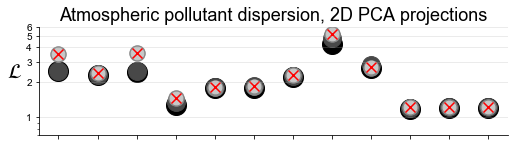

In [16]:
fig = plt.figure(figsize=(len(tex_scalings_list)*0.7, 2))
fig.tight_layout(pad=-30)
widths = [1]
heights = [1]
spec = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths, height_ratios=heights)
x_range = np.array([i for i in range(0,len(tex_scalings_list))])
ax = fig.add_subplot(spec[0,0])

for i, sample_percentage in enumerate(sample_percentage_list):
    costs = pd.read_csv('../results/SUPPLEMENT-atmospheric-physics-perc-of-data-' + str(sample_percentage) + '-2D-LDM-optimizing-on-Sct-pure-scaling-cost-cumulative.csv', sep = ',', header=None).to_numpy()
    if sample_percentage ==100:
        plt.scatter(x_range, costs, c='r', marker='x', s=100, linewidths=2, label=str(sample_percentage) + '%')
    else:
        plt.scatter(x_range, costs, c=colors[i], marker='o', s=400-80*i, label=str(sample_percentage) + '%')

plt.xticks(x_range, [], fontsize=16)
plt.grid(alpha=0.3, zorder=0)
plt.xlim([-0.5,len(tex_scalings_list)-0.5])
ax.set_yscale('log')
ax.set_yticks([1,2,3,4,5,6])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.ylim([0.7,6])
plt.ylabel('$\mathcal{L}$', fontsize=20, rotation=0, horizontalalignment='right')
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
ax.xaxis.grid(False)
ax.yaxis.grid(True)
plt.title('Atmospheric pollutant dispersion, 2D PCA projections', fontsize=18)

plt.savefig('../figures/supplement-atmospheric-physics-data-sampling-2D-LDM.svg', dpi=200, bbox_inches='tight')

<a id=atmo-3D></a>

### Plot the result of data sampling on 3D projections

[Go to the top](#top-page)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

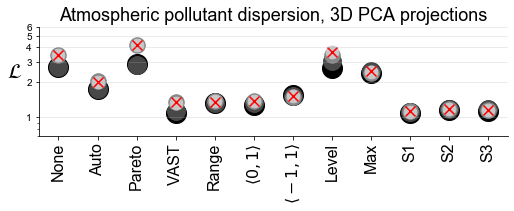

In [17]:
fig = plt.figure(figsize=(len(tex_scalings_list)*0.7, 2))
fig.tight_layout(pad=-30)
widths = [1]
heights = [1]
spec = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths, height_ratios=heights)
x_range = np.array([i for i in range(0,len(tex_scalings_list))])
ax = fig.add_subplot(spec[0,0])

for i, sample_percentage in enumerate(sample_percentage_list):
    costs = pd.read_csv('../results/SUPPLEMENT-atmospheric-physics-perc-of-data-' + str(sample_percentage) + '-3D-LDM-optimizing-on-Sct-pure-scaling-cost-cumulative.csv', sep = ',', header=None).to_numpy()
    if sample_percentage ==100:
        plt.scatter(x_range, costs, c='r', marker='x', s=100, linewidths=2, label=str(sample_percentage) + '%')
    else:
        plt.scatter(x_range, costs, c=colors[i], marker='o', s=400-80*i, label=str(sample_percentage) + '%')

plt.xticks(x_range, tex_scalings_list, fontsize=16, rotation=90)
plt.grid(alpha=0.3, zorder=0)
plt.xlim([-0.5,len(tex_scalings_list)-0.5])
ax.set_yscale('log')
ax.set_yticks([1,2,3,4,5,6])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.ylim([0.7,6])
plt.ylabel('$\mathcal{L}$', fontsize=20, rotation=0, horizontalalignment='right')
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
ax.xaxis.grid(False)
ax.yaxis.grid(True)
plt.title('Atmospheric pollutant dispersion, 3D PCA projections', fontsize=18)

plt.savefig('../figures/supplement-atmospheric-physics-data-sampling-3D-LDM.svg', dpi=200, bbox_inches='tight')

***